In [25]:
# Import dependencies
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Extracted Hand Landmarks: [0.6554768681526184, 0.8484537601470947, 0.7419934272766113, 0.8142902255058289, 0.7723837494850159, 0.7186757922172546, 0.7123444676399231, 0.6566640138626099, 0.6414170265197754, 0.6295195817947388, 0.7349777221679688, 0.6300678849220276, 0.7248570919036865, 0.533820390701294, 0.7118695974349976, 0.46802252531051636, 0.6957326531410217, 0.41424912214279175, 0.6765351891517639, 0.6287224888801575, 0.6819493174552917, 0.5125325322151184, 0.6905071139335632, 0.44059404730796814, 0.6907874941825867, 0.38347434997558594, 0.6225106120109558, 0.6499698162078857, 0.6202087998390198, 0.6068249940872192, 0.6506428122520447, 0.6763840317726135, 0.6644954085350037, 0.7236581444740295, 0.5698870420455933, 0.686748743057251, 0.5853152871131897, 0.6468542218208313, 0.616083025932312, 0.70245760679245, 0.6250312328338623, 0.7454282641410828]
Length of landmark data: 42


I0000 00:00:1740526781.345417 16293413 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1740526781.351970 17848131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740526781.356886 17848131 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


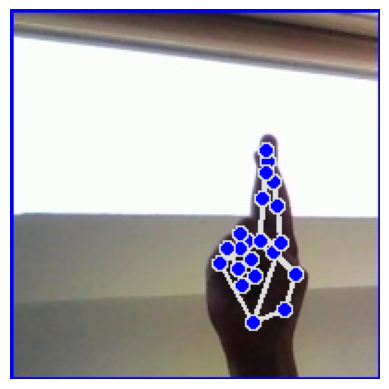

In [30]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

def extract_hand_landmarks(image_path):
    """Extracts hand landmarks from an image using MediaPipe and returns the data along with its length."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    
    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        data = []
        for landmark in landmarks.landmark:
            data.append(landmark.x)
            data.append(landmark.y)
        data_length = len(data)
        return data, data_length
    return None, 0

def display_image_with_landmarks(image_path):
    """Displays an image with hand landmarks drawn using MediaPipe and prints the length of landmark data."""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            landmarks_data = [(landmark.x, landmark.y) for landmark in hand_landmarks.landmark]
    
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Test example
image_path = '../Dataset/Original/R/R2812.jpg'  # Replace with actual path
landmarks, length = extract_hand_landmarks(image_path)
if landmarks:
    print(f"Extracted Hand Landmarks: {landmarks}")
    print(f"Length of landmark data: {length}")
    display_image_with_landmarks(image_path)
else:
    print("No hand landmarks detected.")


Hand landmarks for the image: [0.6554768681526184, 0.8484537601470947, 0.7419934272766113, 0.8142902255058289, 0.7723837494850159, 0.7186757922172546, 0.7123444676399231, 0.6566640138626099, 0.6414170265197754, 0.6295195817947388, 0.7349777221679688, 0.6300678849220276, 0.7248570919036865, 0.533820390701294, 0.7118695974349976, 0.46802252531051636, 0.6957326531410217, 0.41424912214279175, 0.6765351891517639, 0.6287224888801575, 0.6819493174552917, 0.5125325322151184, 0.6905071139335632, 0.44059404730796814, 0.6907874941825867, 0.38347434997558594, 0.6225106120109558, 0.6499698162078857, 0.6202087998390198, 0.6068249940872192, 0.6506428122520447, 0.6763840317726135, 0.6644954085350037, 0.7236581444740295, 0.5698870420455933, 0.686748743057251, 0.5853152871131897, 0.6468542218208313, 0.616083025932312, 0.70245760679245, 0.6250312328338623, 0.7454282641410828]
Time taken to extract landmarks: 0.0218 seconds


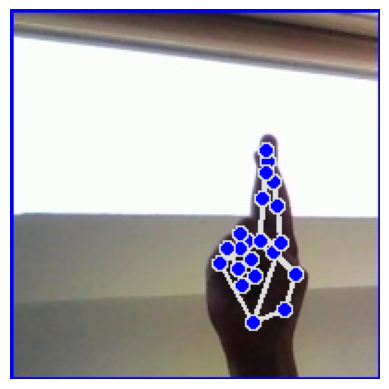

E0000 00:00:1740526661.015959 17609315 calculator_graph.cc:928] INVALID_ARGUMENT: CalculatorGraph::Run() failed: 
; Packet timestamp mismatch on a calculator receiving from stream "image". Current minimum expected timestamp is 20133133 but received 20133132. Are you using a custom InputStreamHandler? Note that some InputStreamHandlers allow timestamps that are not strictly monotonically increasing. See for example the ImmediateInputStreamHandler class comment.
E0000 00:00:1740526661.015970 17609337 calculator_graph.cc:928] INVALID_ARGUMENT: CalculatorGraph::Run() failed: 
; Packet timestamp mismatch on a calculator receiving from stream "image". Current minimum expected timestamp is 20133133 but received 20133132. Are you using a custom InputStreamHandler? Note that some InputStreamHandlers allow timestamps that are not strictly monotonically increasing. See for example the ImmediateInputStreamHandler class comment.
E0000 00:00:1740526661.015965 17609319 calculator_graph.cc:928] INVALI

In [ ]:
image_path = '../Dataset/Original/R/R2812.jpg'  # Change to an actual path

start_time = time.time()
landmarks = extract_hand_landmarks(image_path)
end_time = time.time()

time_taken = end_time - start_time

if landmarks:
    print(f"Hand landmarks for the image: {landmarks}")
    print(f"Time taken to extract landmarks: {time_taken:.4f} seconds")
    display_image_with_landmarks(image_path)
else:
    print("No hand landmarks detected for the image.")
    print(f"Time taken to attempt extraction: {time_taken:.4f} seconds")



In [32]:
import logging

os.environ['GLOG_minloglevel'] = '2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('mediapipe').setLevel(logging.ERROR)

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
)

output_dir = '../Dataset/Generated_Data'
os.makedirs(output_dir, exist_ok=True)

def extract_hand_landmarks(image_path):
    """Extracts hand landmarks from an image using MediaPipe."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    
    if results.multi_hand_landmarks:
        landmarks = results.multi_hand_landmarks[0]
        data = []
        for landmark in landmarks.landmark:
            data.append(landmark.x)
            data.append(landmark.y)
        return data
    return None

def preprocess_and_save_landmarks(dataset_dir='../Dataset/Original', output_dir='../Dataset/Generated_Data'):
    """Extracts hand landmarks for all images in the dataset and saves them to a CSV."""
    data = []
    labels = []
    
    for label in os.listdir(dataset_dir):
        label_path = os.path.join(dataset_dir, label)
        
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                landmarks = extract_hand_landmarks(img_path)
                
                if landmarks:
                    data.append(landmarks)
                    labels.append(label)
    
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    df = pd.DataFrame(data, columns=[f'x{i}' if i % 2 == 0 else f'y{i//2}' for i in range(42)])
    df['label'] = labels
    
    output_csv_path = os.path.join(output_dir, f'hand_landmark_{timestamp}.csv')
    df.to_csv(output_csv_path, index=False)
    print(f"Hand landmarks saved to: {output_csv_path}")

# Run the function to process all images and save to CSV
preprocess_and_save_landmarks()


I0000 00:00:1740526861.667430 16293413 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1740526861.675166 17852956 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740526861.680819 17852960 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Hand landmarks saved to: ../Dataset/Generated_Data/hand_landmark_20250225_163702.csv


In [34]:
def count_labels_in_csv(csv_path):
    """Counts the number of entries for each label in the CSV."""
    df = pd.read_csv(csv_path)
    
    label_counts = df['label'].value_counts()
    
    print("Number of entries for each label:")
    print(label_counts)

# Usage example
csv_path = '../Dataset/Generated_Data/hand_landmark_20250225_163702.csv'  # Replace with your actual path
count_labels_in_csv(csv_path)


Number of entries for each label:
label
F        2756
K        2595
Y        2522
V        2490
U        2451
S        2432
J        2430
R        2429
L        2417
W        2394
D        2296
G        2290
H        2281
I        2263
T        2260
Z        2248
E        2202
O        2152
B        2150
A        2085
X        2075
Q        1925
P        1913
C        1769
del      1282
M        1142
space    1126
N         964
Name: count, dtype: int64


In [37]:
# Load the dataset
csv_path = '../Dataset/Generated_Data/hand_landmark_20250225_163702.csv'  # Change to actual path
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Model Accuracy: 98.96%
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       412
           B       0.99      1.00      1.00       421
           C       0.99      1.00      1.00       344
           D       1.00      0.99      0.99       470
           E       1.00      0.99      0.99       432
           F       0.99      1.00      1.00       562
           G       0.99      0.99      0.99       460
           H       0.98      1.00      0.99       435
           I       1.00      0.99      1.00       466
           J       1.00      0.99      0.99       472
           K       0.99      0.98      0.98       494
           L       1.00      1.00      1.00       489
           M       0.97      0.96      0.97       248
           N       0.96      0.97      0.97       186
           O       0.99      1.00      0.99       411
           P       1.00      0.99      1.00       384
           Q       0.99      1.00      1.00       378
    

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
csv_path = '../Dataset/Generated_Data/hand_landmark_20250225_163702.csv'  # Update this with the correct filename
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Encode labels for XGBoost models
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models to test
models = {
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVC": SVC(kernel='linear', probability=True, random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=1000, random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "XGBRFClassifier": XGBRFClassifier(random_state=42)
}

# Dictionary to store results
detailed_results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Use encoded labels for XGBoost models
    if "XGB" in name:
        model.fit(X_train_enc, y_train_enc)
        y_pred = model.predict(X_test_enc)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)
        accuracy = accuracy_score(y_test, y_pred_decoded)
        precision = precision_score(y_test, y_pred_decoded, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred_decoded, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred_decoded, average='weighted', zero_division=0)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    detailed_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert results to DataFrame and display
detailed_results_df = pd.DataFrame(detailed_results)
print(detailed_results_df)

Training and evaluating GaussianNB...
Training and evaluating SGDClassifier...
Training and evaluating LogisticRegression...
Training and evaluating KNeighborsClassifier...
Training and evaluating DecisionTreeClassifier...
Training and evaluating RandomForestClassifier...
Training and evaluating SVC...
Training and evaluating MLPClassifier...
Training and evaluating XGBClassifier...


/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:01:07] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training and evaluating XGBRFClassifier...
                    Model  Accuracy  Precision    Recall  F1 Score
0              GaussianNB  0.413802   0.506854  0.413802  0.411506
1           SGDClassifier  0.934193   0.935276  0.934193  0.930105
2      LogisticRegression  0.978008   0.978386  0.978008  0.977976
3    KNeighborsClassifier  0.978598   0.979024  0.978598  0.978691
4  DecisionTreeClassifier  0.940091   0.940196  0.940091  0.940030
5  RandomForestClassifier  0.989636   0.989717  0.989636  0.989646
6                     SVC  0.986855   0.986965  0.986855  0.986835
7           MLPClassifier  0.993428   0.993489  0.993428  0.993433
8           XGBClassifier  0.989130   0.989194  0.989130  0.989135
9         XGBRFClassifier  0.904196   0.909278  0.904196  0.904957


In [49]:
# More focussed grid search for best hyperparameters for the Multi-Layer Perceptron Classifier

from sklearn.model_selection import GridSearchCV

# Load the dataset
csv_path = '../Dataset/Generated_Data/hand_landmark_20250225_163702.csv'  # Update with correct filename
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(128,), (256, 128), (256, 128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 2000]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters and corresponding score
print("Best Parameters for MLPClassifier:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


7786.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=1000, solver=adam; total time=  32.1s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=2000, solver=adam; total time=  32.7s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=adam; total time=  35.1s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=1000, solver=adam; total time=  35.3s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=1000, solver=adam; total time=  35.6s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=2000, solver=adam; total time=  35.7s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=2000, solver=adam; total time=  35.7s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=adam; total time=  35.8s
[CV] END

/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=1000, solver=sgd; total time= 1.5min
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=2000, solver=sgd; total time= 1.5min
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=1000, solver=adam; total time=  40.2s


/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 1.5min
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=1000, solver=adam; total time=  52.8s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 1.5min
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 1.5min


/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=1000, solver=adam; total time=  55.3s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 1.7min
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=2000, solver=adam; total time=  51.0s
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=2000, solver=adam; total time=  53.3s
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=2000, solver=adam; total time=  39.3s
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 1.6min
[CV] END activation=relu, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 1.6min
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=adaptive, max_iter=1000, solver=adam; total time

/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 6.1min
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 5.8min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=1000, solver=adam; total time= 1.3min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=2000, solver=adam; total time=  42.8s
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=2000, solver=adam; total time=  51.6s
[CV] END activation=relu, hidden_layer_sizes=(256, 128), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 6.1min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=1000, solver=adam; total time=  30.1s
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=2000,

/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=constant, max_iter=1000, solver=sgd; total time= 7.0min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=adam; total time=  29.2s
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=constant, max_iter=2000, solver=sgd; total time= 5.9min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=adam; total time=  34.2s
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=2000, solver=sgd; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=adam; total time=  39.9s
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=constant, max_iter=2000, solver=sgd; total time= 1.6min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=1000, solver=sgd; total ti

/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 1.8min
[CV] END activation=tanh, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=1000, solver=adam; total time=  30.6s


/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 1.8min
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 5.7min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=1000, solver=adam; total time=  40.0s
[CV] END activation=tanh, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=1000, solver=adam; total time= 1.0min


/opt/anaconda3/envs/ASL-Translator/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=1000, solver=sgd; total time= 7.0min
[CV] END activation=tanh, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=2000, solver=adam; total time=  34.2s
[CV] END activation=relu, hidden_layer_sizes=(256, 128, 64), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 6.3min
[CV] END activation=tanh, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=2000, solver=adam; total time=  43.2s
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 1.8min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(128,), learning_rate=adaptive, max_iter=2000, solver=sgd; total time= 1.8min
[CV] END activation=tanh, hidden_layer_sizes=(256, 128), learning_rate=constant, max_iter=2000, solver=adam; tota

Trained MLPClassifier saved to ../Dataset/Generated_Data/mlp_classifier_best_params.pkl
Accuracy: 0.9942
Precision: 0.9942
Recall: 0.9942
F1 Score: 0.9942


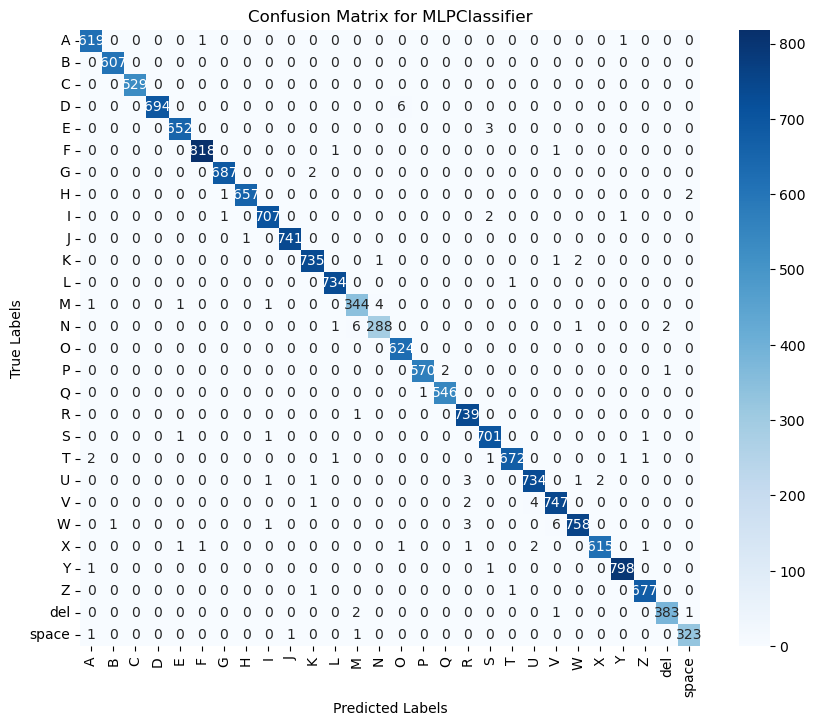

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ensure the dataset exists before proceeding
csv_path = '../Dataset/Generated_Data/hand_landmark_20250225_163702.csv'  # Update with correct filename
df = pd.read_csv(csv_path)

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Train the MLPClassifier with the best parameters and a 30% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the best MLP model
best_mlp = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(128,),
    learning_rate='constant',
    max_iter=1000,
    solver='adam',
    random_state=42
)

# Train the model
best_mlp.fit(X_train, y_train)

# Save the trained model to a .pkl file
model_filename = "../Models/mlp_classifier_best_params.pkl"
joblib.dump(best_mlp, model_filename)

# Model Evaluation
y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Trained MLPClassifier saved to {model_filename}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for MLPClassifier")
plt.show()
